<a href="https://colab.research.google.com/github/SowjanyaKiran/sowjanya-/blob/main/Dry_Bean_Dataset_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#installing neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
# Importing the data
df = pd.read_csv('/content/Dry_Bean_Dataset.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
#SUMMARIZING THE DATASET
print(df.shape)

(13611, 17)


In [5]:
#PRE-PROCESSING THE DATASET
df.isnull().sum()

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


In [7]:
print(df.columns)

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')


In [8]:
# Seperating the input and output data
X = df.drop('Class', axis=1)
y = df['Class']

In [9]:
# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=2000))])

In [20]:
# Taking the predictions from the model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [29]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
Precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", Precision)
Recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", Recall)
F1_Score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", F1_Score)

Accuracy: 0.9265515975027543
Precision: 0.9277901329477568
Recall: 0.9265515975027543
F1 Score: 0.9269362635447583


In [31]:
# Model Evaluation
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)
Precision = precision_score(y_train, y_train_pred, average='weighted')
print("Precision:", Precision)
Recall = recall_score(y_train, y_train_pred, average='weighted')
print("Recall:", Recall)
F1_Score = f1_score(y_train, y_train_pred, average='weighted')
print("F1 Score:", F1_Score)

Accuracy: 0.924504041146216
Precision: 0.9248704835239027
Recall: 0.924504041146216
F1 Score: 0.9246222874120493


In [28]:
# Detailed report
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.91      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.95      0.94      0.94       317
    DERMASON       0.92      0.90      0.91       671
       HOROZ       0.97      0.96      0.97       408
       SEKER       0.97      0.94      0.95       413
        SIRA       0.85      0.90      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



Text(0.5, 1.0, 'Confusion Matrix')

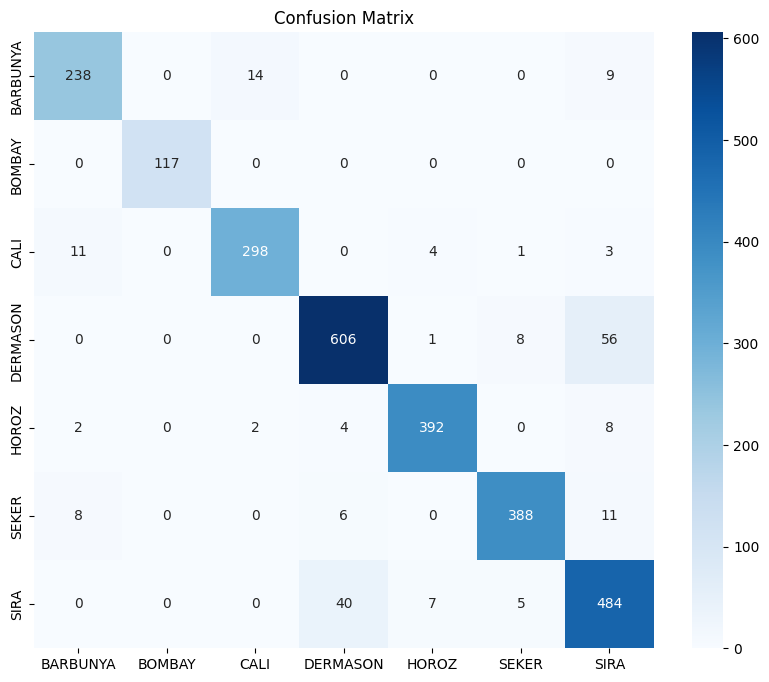

In [38]:
#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')